In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('crop.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,21,82,6.5,203,rice
1,85,58,41,22,80,7.0,227,rice
2,60,55,44,23,82,7.8,264,rice
3,74,35,40,26,80,7.0,243,rice
4,78,42,42,20,82,7.6,263,rice


In [6]:
df.shape

(2200, 8)

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['label'].value_counts()

coconut        100
jute           100
mothbeans      100
rice           100
orange         100
kidneybeans    100
mungbean       100
muskmelon      100
papaya         100
blackgram      100
grapes         100
watermelon     100
apple          100
pomegranate    100
pigeonpeas     100
chickpea       100
mango          100
banana         100
cotton         100
coffee         100
maize          100
lentil         100
Name: label, dtype: int64

In [9]:
print('Average Ratio in the Soil:')
print('Nitrogen : ', df['N'].mean())
print('Pott : ', df['K'].mean())
print('Possop : ', df['P'].mean())
print('Temp : ', df['temperature'].mean())
print('Humidity : ', df['humidity'].mean())
print('pH : ', df['ph'].mean())
print('Rainfall : ', df['rainfall'].mean())


Average Ratio in the Soil:
Nitrogen :  50.551818181818184
Pott :  48.14909090909091
Possop :  53.36272727272727
Temp :  25.61318181818182
Humidity :  71.48272727272727
pH :  6.470045454545455
Rainfall :  103.45818181818181


In [10]:
# plt.subplot(2,4,4)
# sns.distplot(df['temperature'], color='black')
# plt.xlabel('Temperature', fontsize=12)

# plt.subplot(2,4,5)
# sns.distplot(df['rainfall'], color='purple')
# plt.xlabel('Rainfall', fontsize=12)

<AxesSubplot:ylabel='rainfall'>

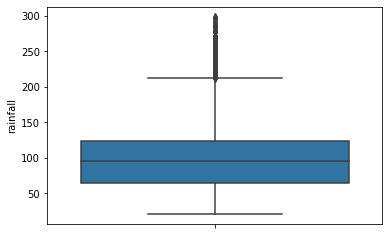

In [11]:
sns.boxplot(y='rainfall', data=df)

<AxesSubplot:xlabel='K', ylabel='P'>

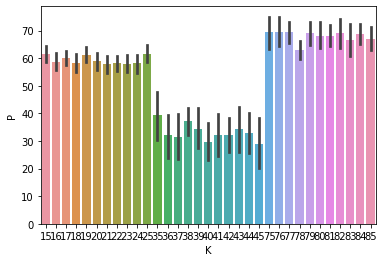

In [12]:
sns.barplot(x='K', y='P', data=df.head(1000))

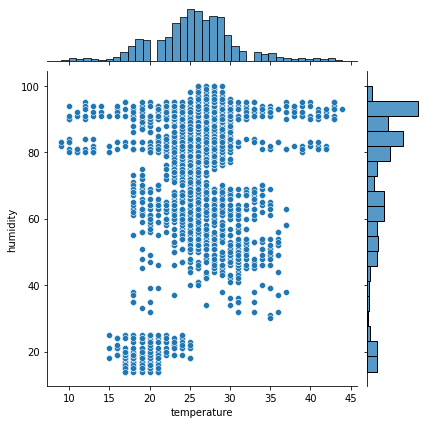

In [13]:
sns.jointplot(x='temperature', y='humidity', data=df, palette='rocket_r')

In [14]:
print('* * * Usefull Information * * *')
print('Crop required Very High Nitrogen ratio in Soil : ', df[df['N'] > 120]['label'].unique())
print('Crop required Very High Potassium ratio in Soil : ', df[df['K'] > 200]['label'].unique())
print('Crop required Very High Phosphorous ratio in Soil : ', df[df['P'] > 100]['label'].unique())
print('Crop required Very High rainfall : ', df[df['rainfall'] > 200]['label'].unique())
print('Crop required Very High Tempertaure : ', df[df['temperature'] > 40]['label'].unique())
print('Crop required Very Low Humidity : ', df[df['humidity'] < 20]['label'].unique())
print('Crop required Very High pH : ', df[df['ph'] > 9]['label'].unique())
print('Crop required Very Low pH : ', df[df['ph'] < 4]['label'].unique())

* * * Usefull Information * * *
Crop required Very High Nitrogen ratio in Soil :  ['cotton']
Crop required Very High Potassium ratio in Soil :  ['grapes' 'apple']
Crop required Very High Phosphorous ratio in Soil :  ['grapes' 'apple']
Crop required Very High rainfall :  ['rice' 'papaya' 'coconut']
Crop required Very High Tempertaure :  ['grapes' 'papaya']
Crop required Very Low Humidity :  ['chickpea' 'kidneybeans']
Crop required Very High pH :  ['mothbeans']
Crop required Very Low pH :  ['mothbeans']


In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
X = df.drop('label', axis=1)
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
mo = LogisticRegression()

In [19]:
mo.fit(X_train, y_train)

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred = mo.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

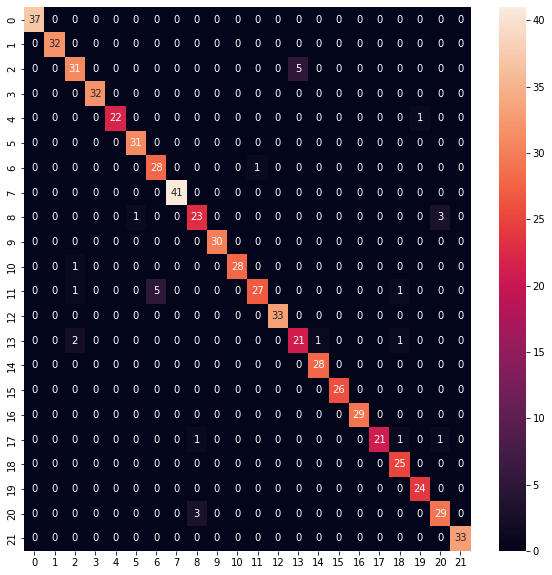

In [22]:
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, pred)
cr = classification_report(y_test, pred)
sns.heatmap(cm, annot = True)

In [23]:
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       0.89      0.86      0.87        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      0.96      0.98        23
      coffee       0.97      1.00      0.98        31
      cotton       0.85      0.97      0.90        29
      grapes       1.00      1.00      1.00        41
        jute       0.85      0.85      0.85        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        29
       maize       0.96      0.79      0.87        34
       mango       1.00      1.00      1.00        33
   mothbeans       0.81      0.84      0.82        25
    mungbean       0.97      1.00      0.98        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [24]:
prediction = mo.predict((np.array([[90,40,40,20,80,7,200]])))
prediction

array(['rice'], dtype=object)

In [25]:
prediction = mo.predict((np.array([[70,60,80,10,80,6,200]])))
prediction

array(['papaya'], dtype=object)

In [26]:
import pickle
pickle.dump(mo, open('crop.pkl',"wb"))
pickle.dump(mo, open('vect.pkl',"wb"))

In [28]:
m = pickle.load(open('vect.pkl', 'rb'))
m.predict(X_test)

array(['mango', 'chickpea', 'mothbeans', 'muskmelon', 'jute', 'maize',
       'coffee', 'cotton', 'grapes', 'kidneybeans', 'pigeonpeas',
       'muskmelon', 'papaya', 'blackgram', 'cotton', 'pigeonpeas',
       'cotton', 'watermelon', 'muskmelon', 'coconut', 'cotton',
       'blackgram', 'muskmelon', 'grapes', 'chickpea', 'watermelon',
       'coffee', 'coconut', 'watermelon', 'coffee', 'rice', 'banana',
       'pomegranate', 'maize', 'blackgram', 'lentil', 'watermelon',
       'watermelon', 'rice', 'pigeonpeas', 'orange', 'orange', 'rice',
       'grapes', 'kidneybeans', 'kidneybeans', 'mothbeans', 'lentil',
       'pigeonpeas', 'lentil', 'kidneybeans', 'pigeonpeas', 'lentil',
       'coffee', 'muskmelon', 'cotton', 'papaya', 'watermelon', 'grapes',
       'banana', 'chickpea', 'grapes', 'apple', 'muskmelon', 'lentil',
       'grapes', 'cotton', 'watermelon', 'mungbean', 'watermelon',
       'blackgram', 'kidneybeans', 'apple', 'blackgram', 'mothbeans',
       'jute', 'mothbeans', 'gr